# Faragó Facundo - Gustavo Doctorovich

# *Importar librerias y dataset*

In [1]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend
import WholeBrain.Observables.FC as FC
import WholeBrain.Observables.swFCD as swFCD
import WholeBrain.Observables.phFCD as phFCD
import WholeBrain.Observables.GBC as GBC
import os
import Tests.Deco2018.prepro as prepro
import Tests.Deco2018.plot as fig_goptim


# Cambio constante de la libreria para que no descarte datos
phFCD.discardOffset = 0

# Ruta al archivo de texto con los datos de los sujetos 25x25
ruta_archivo_25 = 'Datos/Datasets/StructuralConnectivity/netmats2_25.txt'

# Ruta al archivo de texto con los datos de los sujetos 200x200
ruta_archivo_200 = 'Datos/Datasets/StructuralConnectivity/netmats2_200.txt'

# Ruta al archivo de texto con los time series
ruta_archivo_ts = 'Datos/Datasets/fMRI/100206.txt'

# Cargar los datos de los sujetos desde los archivos de texto
datos_sujetos_25 = np.loadtxt(ruta_archivo_25)
datos_sujetos_200 = np.loadtxt(ruta_archivo_200)

# Reshape para crear matriz 3D 
matrices_por_sujeto_25 = datos_sujetos_25.reshape((1003, 25, 25))
matrices_por_sujeto_200 = datos_sujetos_200.reshape((1003, 200, 200))

# Calcular la matriz de conectividad promedio de todos los sujetos
matriz_conectividad_promedio = np.mean(matrices_por_sujeto_25, axis=0)
matriz_conectividad_promedio = matriz_conectividad_promedio/matriz_conectividad_promedio.max()
matriz_conectividad_promedio = matriz_conectividad_promedio*0.1

# Cargar los datos timeseries de los sujetos desde el archivo de texto
datos_ts = np.loadtxt(ruta_archivo_ts)

# Reshape para crear una matriz 2D (4800, 25)
matriz_ts = datos_ts.reshape((4800, 25))
matriz_ts = matriz_ts[:1200, :]
matriz_tsT = matriz_ts.T

Going to use a matrix distance measure...
Going to use Functional Connectivity (FC)...
Going to use Sliding Windows Functional Connectivity Dynamics (swFCD)...
Going to use Phase-Interaction Matrix...
Going to use Phase Functional Connectivity Dynamics (phFCD)...
Going to use Global Brain Connectivity (GBC)...
Going to use the Euler-Maruyama Integrator...
Going to use Stephan2008 BOLD model...
Going to use the Balanced J9 (FIC) mechanism...


In [4]:
# Establecer la diagonal en ceros
np.fill_diagonal(matriz_conectividad_promedio, 0)

# *Resultados*

## Sin WholeBrain

### Matriz de conectividad

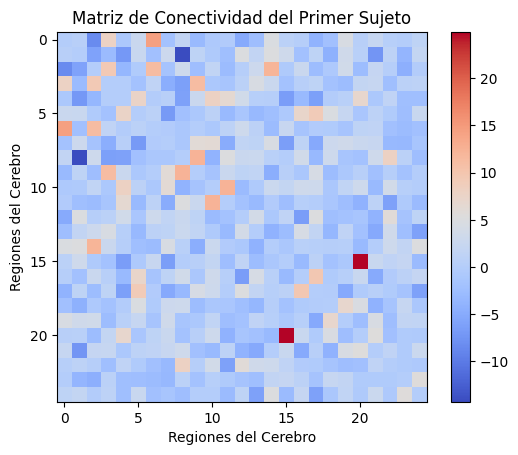

In [2]:
# Seleccionar una sola matriz de conectividad (por ejemplo, la primera)
matriz_conectividad_individual = matrices_por_sujeto_25[0]

# Crear la visualización de la matriz de conectividad individual
plt.imshow(matriz_conectividad_individual, cmap='coolwarm', interpolation='none')
plt.colorbar()  # Añadir la barra de color
plt.title('Matriz de Conectividad del Primer Sujeto')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')

# Mostrar la visualización
plt.show()

### Matriz promedio de matrices de conectividad

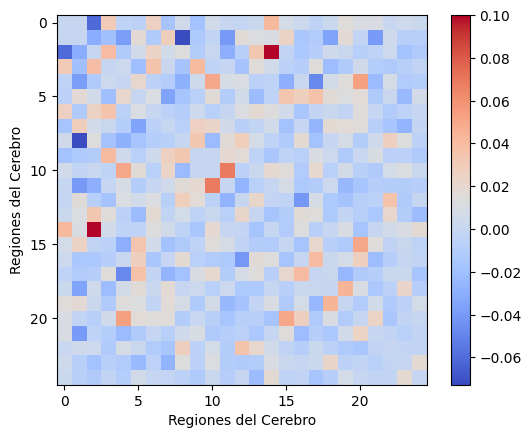

In [5]:
# Visualizar la matriz de conectividad promedio
plt.imshow(matriz_conectividad_promedio, cmap='coolwarm', interpolation='none')
plt.colorbar()  # Añadir la barra de color
#plt.title('Matriz de Conectividad Promedio de Todos los Sujetos')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')

# Mostrar la visualización
plt.show()

### fRMI

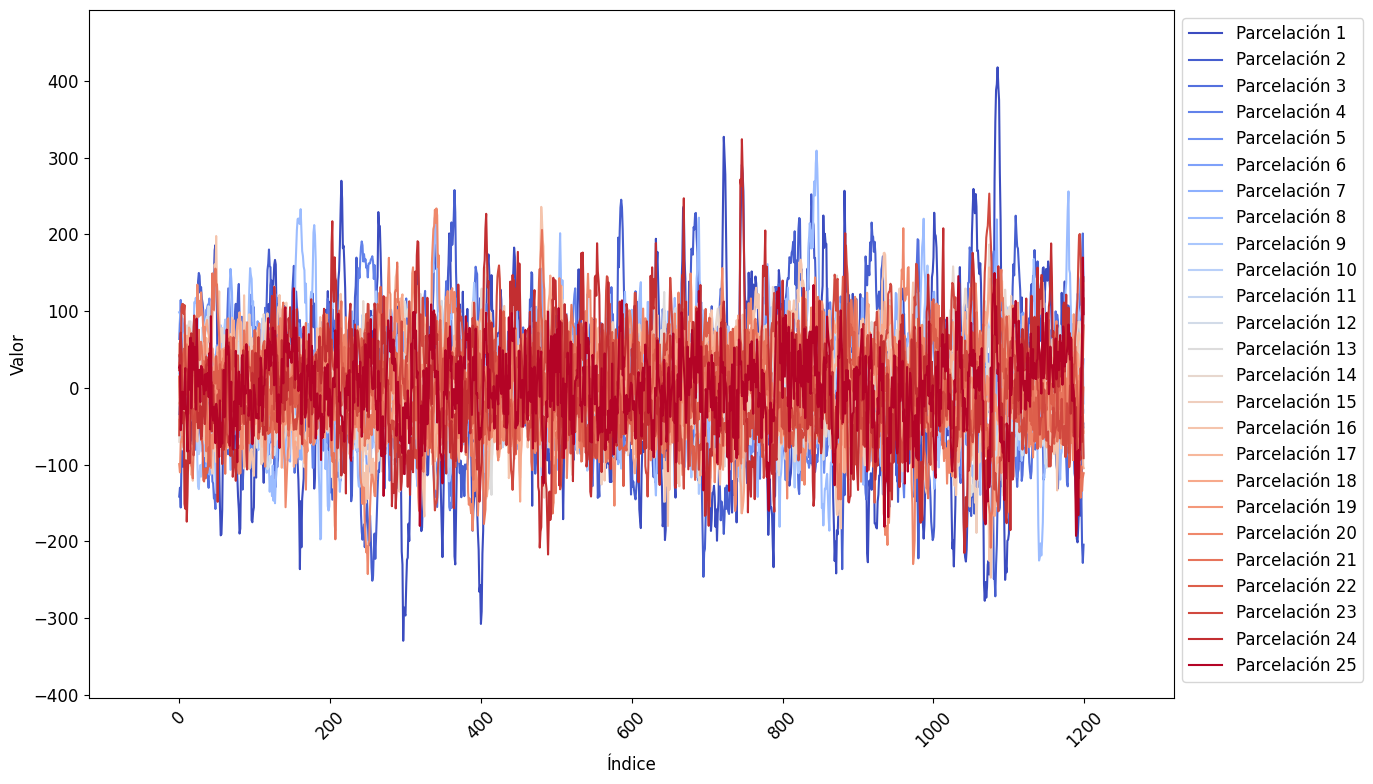

In [9]:
# Calcular el promedio de cada columna
promedios = np.mean(matriz_ts, axis=0)

# Restar el promedio de cada columna a la misma columna
matrizrp = matriz_ts - promedios

matrizrp_detrended = detrend(matrizrp, type='linear')

# Crear un gráfico con un tamaño más grande
plt.figure(figsize=(12, 8))

# Obtener el número de columnas y generar colores únicos para cada una de las regiones
num_columnas = matrizrp_detrended.shape[1]
colores = plt.cm.coolwarm(np.linspace(0, 1, num_columnas))

# Iterar sobre cada columna de la matriz y graficarla como una curva con un color distinto cada región
for i in range(num_columnas):
    plt.plot(matrizrp_detrended[:, i], color=colores[i], label=f'Parcelación {i+1}')

# Agregar etiquetas y leyenda
plt.xlabel('Índice')
plt.ylabel('Valor')

# Ajustar el tamaño de la fuente
plt.rcParams['font.size'] = 12

# Rotar las etiquetas del eje x para evitar superposiciones
plt.xticks(rotation=45)

# Mejorar la disposición del gráfico
plt.tight_layout()

# Ajustar la posición de la leyenda fuera del área del gráfico
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ajustar los márgenes del gráfico
plt.margins(x=0.1, y=0.1)

# Mostrar el gráfico
plt.show()

### Correlacion (fMRI)

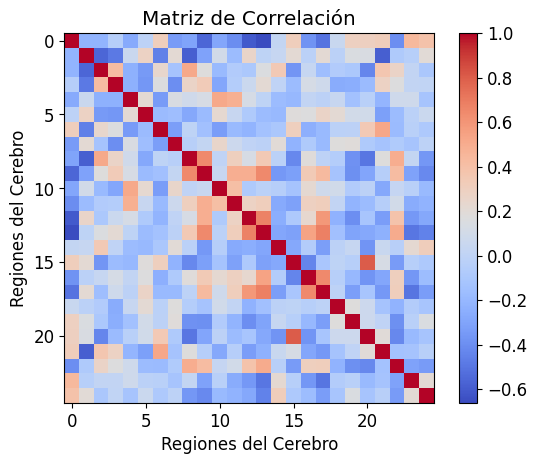

In [7]:
# Calcular el promedio de cada columna
promedios = np.mean(matriz_ts, axis=0)

# Restar el promedio de cada columna a la misma columna
matrizrp = matriz_ts - promedios

matrizrp_detrended = detrend(matrizrp, type='linear')

matriz_correlacion = np.corrcoef(matrizrp_detrended, rowvar=False)

# Crear la visualización de la matriz de correlación promedio
plt.imshow(matriz_correlacion, cmap='coolwarm', interpolation='none')
plt.colorbar()  # Añadir la barra de color
#plt.title('Matriz de Correlación')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')


# Mostrar la visualización
plt.show()


## Con WholeBrain

### Functional Connectivity

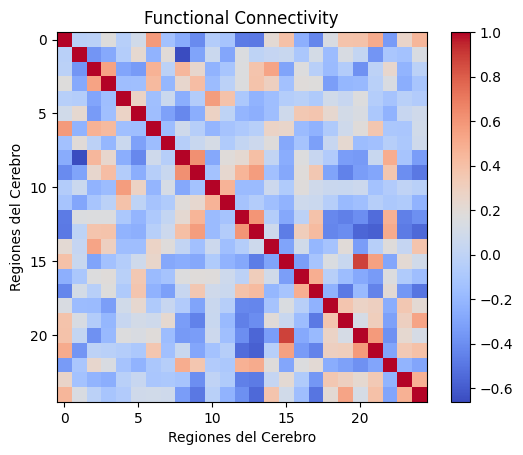

In [31]:
FC_mt = FC.from_fMRI(matriz_tsT, True, True)

# Crear la visualización de la matriz de correlación promedio
plt.imshow(FC_mt, cmap='coolwarm')
plt.colorbar()  # Añadir la barra de color
plt.title('Functional Connectivity')
plt.xlabel('Regiones del Cerebro')
plt.ylabel('Regiones del Cerebro')

# Mostrar la visualización
plt.show()

### Sliding Window FCD


In [ ]:
sw_FCD = swFCD.from_fMRI(matriz_tsT,True,True)
sw_FCD_mt = swFCD.buildFullMatrix(sw_FCD)  

In [ ]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(5, 5))  # Puedes ajustar los valores (ancho, alto) según tus preferencias

# Crear la visualización de la matriz de correlación promedio
plt.imshow(sw_FCD_mt, cmap='coolwarm')
plt.colorbar()  # Añadir la barra de color
plt.title('Sliding Window FCD')
plt.xlabel('Time')
plt.ylabel('Time')

# Mostrar la visualización
plt.show() 

### Phase Interaction Matrix

In [4]:
ph_FCD = phFCD.from_fMRI(matriz_tsT,True,True)
ph_FCD_mt = phFCD.buildFullMatrix(ph_FCD)             

In [ ]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(5, 5))  # Puedes ajustar los valores (ancho, alto) según tus preferencias

# Crear la visualización de la matriz de correlación promedio
plt.imshow(ph_FCD_mt, cmap='coolwarm')
plt.colorbar()  # Añadir la barra de color
plt.title('Phase Interaction Matrix')
plt.xlabel('Time')
plt.ylabel('Time')

# Mostrar la visualización
plt.show()   

### Global Brain Connectivity

In [ ]:
FCD_mt = GBC.from_fMRI(matriz_tsT,True,True)
GBC_mt = GBC.postprocess(FCD_mt) 

In [ ]:
# Reformatear el vector a una matriz de una columna (25x1)
matriz = GBC_mt.reshape((25, 1))

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Mostrar la matriz como imagen
im = ax.imshow(matriz, cmap='coolwarm', aspect='auto', extent=[0, 1, 0, 25])

# Añadir una barra de color
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Valor')

# Ajustar las etiquetas del eje x
ax.set_xticks([])  # Desactivar las etiquetas del eje x

# Añadir etiquetas y título
plt.ylabel('Regiones del Cerebro')
plt.title('Global Brain Connectivity')

# Mostrar la visualización
plt.show()

### Figura DMF

#### Deco

##### 25x25

=    simulating E-E (no FIC)         =


100%|██████████| 111/111 [00:44<00:00,  2.49it/s]


=    simulating FIC                  =
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.05.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.1.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.15.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.2.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.25.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.3.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.35.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.4.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.45.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.5.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.55.txt !!!
Loading file (@loadOrCompute): Datos/Results/Results_25x25\results_0.6.txt !!!
Loading

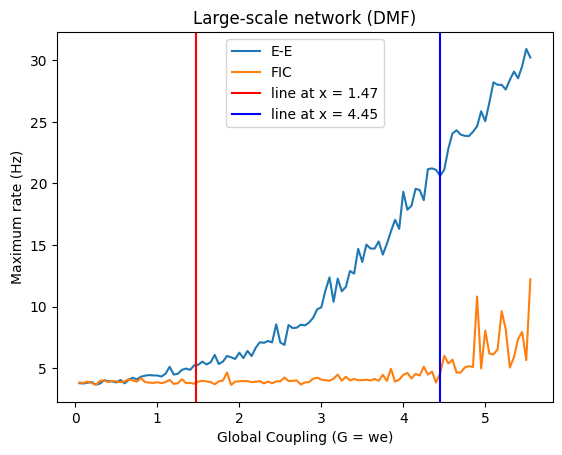

In [3]:
import Tests.Deco_Optim1 as fig_Deco

# Carpeta destino
folder_path = 'Datos/Results/Results_25x25'

# Calculo DMF
fig_Deco.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName=os.path.join(folder_path, 'results_{}.txt'), num_processes=6, wEnd=5.5+0.01)

##### 200x200

In [ ]:
import Tests.Deco_Optim1 as fig_Deco

# Carpeta destino
folder_path = 'Datos/Results/Results_200x200'

# Calculo DMF
fig_Deco.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName=os.path.join(folder_path, 'results_{}.txt'), num_processes=6)

#### Herzog

##### 25x25

=    simulating E-E (no FIC)         =


100%|██████████| 120/120 [01:16<00:00,  1.56it/s]


=    simulating FIC                  =
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.05.txt
Balancing for we=0.05
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.1.txt
Balancing for we=0.1
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.15.txt
Balancing for we=0.15000000000000002
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.2.txt
Balancing for we=0.2
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.25.txt
Balancing for we=0.25
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.3.txt
Balancing for we=0.3
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.35.txt
Balancing for we=0.35000000000000003
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.4.txt
Balancing for we=0.4
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.45.txt
Balancing for we=0.45
Computing (@loadOrCompute): Datos/Results/Results_Herzog\results_0.5.txt
Ba

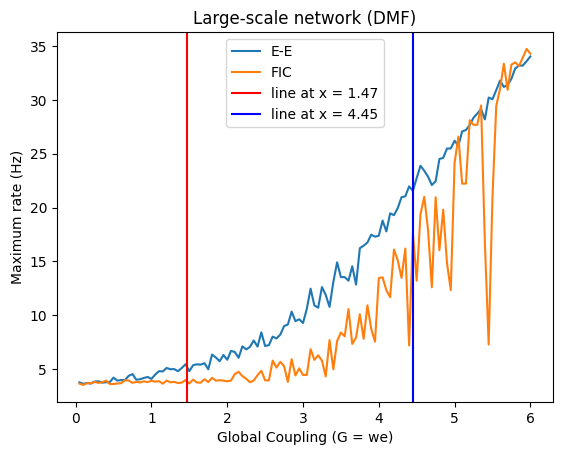

In [8]:
import Tests.Herzog as fig_Herzog

# Carpeta destino
folder_path = 'Datos/Results/Results_Herzog'

# Calculo DMF
fig_Herzog.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName=os.path.join(folder_path, 'results_{}.txt'), num_processes= 4)

##### Datos Gus

=    simulating E-E (no FIC)         =


100%|██████████| 120/120 [01:31<00:00,  1.31it/s]


=    simulating FIC                  =
Computing (@loadOrCompute): Datos/Results/Results_test2\results_0.05.txt
Balancing for we=0.05
Computing (@loadOrCompute): Datos/Results/Results_test2\results_0.1.txt
Balancing for we=0.1
Computing (@loadOrCompute): Datos/Results/Results_test2\results_0.15.txt
Balancing for we=0.15000000000000002
Computing (@loadOrCompute): Datos/Results/Results_test2\results_0.2.txt
Balancing for we=0.2
Computing (@loadOrCompute): Datos/Results/Results_test2\results_0.25.txt
Balancing for we=0.25
Computing (@loadOrCompute): Datos/Results/Results_test2\results_0.3.txt
Balancing for we=0.3
Computing (@loadOrCompute): Datos/Results/Results_test2\results_0.35.txt
Balancing for we=0.35000000000000003
Computing (@loadOrCompute): Datos/Results/Results_test2\results_0.4.txt
Balancing for we=0.4
Computing (@loadOrCompute): Datos/Results/Results_test2\results_0.45.txt
Balancing for we=0.45
Computing (@loadOrCompute): Datos/Results/Results_test2\results_0.5.txt
Balancing fo

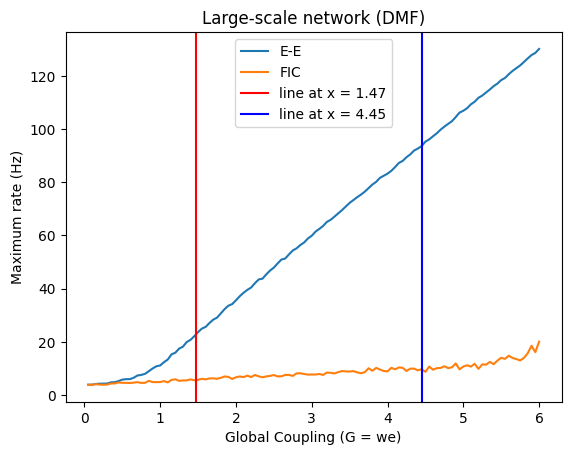

In [7]:
import Tests.Herzog as fig_Herzog
import scipy.io as sio

# Cargo SC
SC = sio.loadmat('Datos/Datasets/StructuralConnectivity/Human_66.mat')

# Carpeta destino
folder_path = 'Datos/Results/Results_test2'

# Calculo DMF
fig_Herzog.plotMaxFrecForAllWe(SC['C'], fileName=os.path.join(folder_path, 'results_{}.txt'), num_processes= 4)

#### Naskar

=    simulating Naskar               =

Processing: 0.05  maxRateFIC => 2.9439709688675926

Processing: 0.1  maxRateFIC => 2.942013373295215

Processing: 0.15000000000000002  maxRateFIC => 2.9454438776760767

Processing: 0.2  maxRateFIC => 2.944123862853162

Processing: 0.25  maxRateFIC => 2.9449958742475255

Processing: 0.3  maxRateFIC => 2.9452415610966627

Processing: 0.35000000000000003  maxRateFIC => 2.9445455617975322

Processing: 0.4  maxRateFIC => 2.9504920848105343

Processing: 0.45  maxRateFIC => 2.9452631665268583

Processing: 0.5  maxRateFIC => 2.9403043724161493

Processing: 0.55  maxRateFIC => 2.946713897480467

Processing: 0.6000000000000001  maxRateFIC => 2.9430501252097363

Processing: 0.6500000000000001  maxRateFIC => 2.9466620081389188

Processing: 0.7000000000000001  maxRateFIC => 2.945376638963768

Processing: 0.7500000000000001  maxRateFIC => 2.9471874874908743

Processing: 0.8  maxRateFIC => 2.946818539423187

Processing: 0.8500000000000001  maxRateFIC => 2.95014

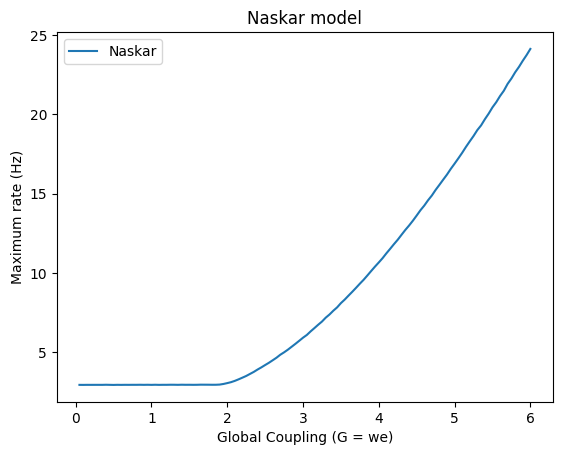

In [5]:
import Tests.Fig_Naskar as fig_Naskar

# Carpeta destino
folder_path = 'Datos/Results/Results_test2'

# Calculo DMF
fig_Naskar.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName=os.path.join(folder_path, 'results_{}.txt'))

##### Datos Naskar

In [2]:
import Tests.Fig_Naskar as fig_Naskar
import scipy.io as sio

fig_Naskar.integrator.clamping = True
fig_Naskar.integrator.clamping_max = 2
# Cargo SC
SC = sio.loadmat('Datos/Datasets/StructuralConnectivity/avgSC68.mat')

# Carpeta destino
folder_path = 'Datos/Results/Results_test2'

# Calculo DMF
fig_Naskar.plotMaxFrecForAllWe(SC['avgSC40'], fileName=os.path.join(folder_path, 'results_{}.txt'), wEnd=1.5)

Going to use the Dynamic Mean Field (DMF) neuronal model...
=    simulating Naskar               =

Processing: 0.05  maxRateFIC => 2.9445878484433807

Processing: 0.1  maxRateFIC => 2.9452109334942844

Processing: 0.15000000000000002  maxRateFIC => 2.942559659361839

Processing: 0.2  maxRateFIC => 2.9385756987036418

Processing: 0.25  maxRateFIC => 2.938073590632482

Processing: 0.3  maxRateFIC => 2.9392431396570706

Processing: 0.35000000000000003  maxRateFIC => 2.938086399315012

Processing: 0.4  maxRateFIC => 2.9399060046968226

Processing: 0.45  maxRateFIC => 3.715860354205375

Processing: 0.5  maxRateFIC => 8.799972830314681

Processing: 0.55  maxRateFIC => 16.734989884853352

Processing: 0.6000000000000001  


KeyboardInterrupt



In [19]:
print("Claves en el archivo .mat:", SC.keys())

Claves en el archivo .mat: dict_keys(['__header__', '__version__', '__globals__', 'avgSC40'])


#### Naskar - Deco - Herzog

=    simulating Naskar               =

Processing: 0.05  maxRateFIC => 2.944904566903019

Processing: 0.1  maxRateFIC => 2.944320995254365

Processing: 0.15000000000000002  maxRateFIC => 2.946785660235906

Processing: 0.2  maxRateFIC => 2.9463159589532775

Processing: 0.25  maxRateFIC => 2.9468879865448594

Processing: 0.3  maxRateFIC => 2.9446336215632862

Processing: 0.35000000000000003  maxRateFIC => 2.9480912493994045

Processing: 0.4  maxRateFIC => 2.945909888822278

Processing: 0.45  maxRateFIC => 2.9507957872178583

Processing: 0.5  maxRateFIC => 2.946197377749217

Processing: 0.55  maxRateFIC => 2.94966095697311

Processing: 0.6000000000000001  maxRateFIC => 2.951617140856505

Processing: 0.6500000000000001  maxRateFIC => 2.9495576301751263

Processing: 0.7000000000000001  maxRateFIC => 2.948952576273617

Processing: 0.7500000000000001  maxRateFIC => 2.9483627308926805

Processing: 0.8  maxRateFIC => 2.949282689184888

Processing: 0.8500000000000001  maxRateFIC => 2.9473538219

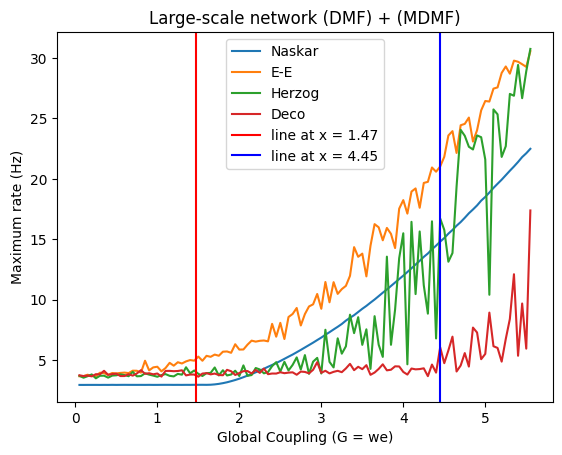

In [3]:
import Tests.NDH as fig_NDH

# Carpeta destino
folder_path_h = 'Datos/Results/Results_Herzog'
folder_path_d = 'Datos/Results/Results_25x25'

# Calculo DMF
fig_NDH.plotMaxFrecForAllWe(matriz_conectividad_promedio, fileName_H=os.path.join(folder_path_h, 'results_{}.txt'), fileName_D=os.path.join(folder_path_d, 'results_{}.txt'), wEnd = 5.55+0.01)

plt.show()

### Curvas G Optimo

In [2]:
import WholeBrain.Utils.FIC.Balance_Herzog2022 as Balance_Herzog2022
#import WholeBrain.Utils.FIC.Balance_DecoEtAl2014 as Balance_DecoEtAl2014
#import WholeBrain.Models.DynamicMeanField as DMF
import WholeBrain.Models.Naskar as Naskar

outFilePath = 'Datos/Results/Results_test/'
inFilePath = 'Datos/Datasets'
prepro.scale = 1
prepro.outFilePath = outFilePath 
prepro.inFilePath = inFilePath
#prepro.BalanceFIC.balancingMechanism = Balance_Herzog2022 


J_fileNames = outFilePath + "results_{}.txt"
prepro.prepro_G_Optim(neuronalModel= Naskar, J_fileNames=J_fileNames)

Going to use the Balanced J (FIC) mechanism in HerzogEtAl2022...
Going to use the Dynamic Mean Field (DMF) neuronal model...
Loading Datos/Datasets/StructuralConnectivity/netmats2_25.txt
Loading Datos/Datasets/fMRI/...
matriz_tridimensional is (25, 1200) and each entry has N=25 regions and Tmax=4800
Simulating 2 subjects!


Recompiling signatures!!!


###################################################################
# Compute G_Optim
###################################################################



*************** Starting: optim1D.distanceForAll_Parms *****************


tc(2 subjects): each entry has N=25 regions
Loading file (@loadOrCompute): Datos/Results/Results_test//fNeuro_emp.mat !!!


 ====================== Model Simulations ======================


Computing (@loadOrCompute): Datos/Results/Results_test//fitting_we0.0.mat
   --- BEGIN TIME @ we=0.0 ---
   Simulating we=0.0 -> subject 1/2!!!


D:\PycharmProjects\WholeBrain\WholeBrain\Integrators\EulerMaruyama.py:30: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 1, 'C', False, aligned=True))
  dvars_obsVars = neuronalModel.dfun(simVars, coupling, stimulus)


   Simulating we=0.0 -> subject 2/2!!!
   Processing signal 1/2 Subject: 0 (25x210) -> computed in 2.1915177999999287 seconds
   Processing signal 2/2 Subject: 1 (25x210) -> computed in 0.4526613999987603 seconds
   --- TOTAL TIME: 90.19240150000041 seconds ---
#0/1: FC: 0.004857669577515991; swFCD: 0.501755021009084; phFCD: 0.20507063724624536;

Computing (@loadOrCompute): Datos/Results/Results_test//fitting_we0.1.mat
   --- BEGIN TIME @ we=0.1 ---
   Simulating we=0.1 -> subject 1/2!!!
   Simulating we=0.1 -> subject 2/2!!!
   Processing signal 1/2 Subject: 0 (25x210) -> computed in 0.4529694000011659 seconds
   Processing signal 2/2 Subject: 1 (25x210) -> computed in 0.47090550000029907 seconds
   --- TOTAL TIME: 83.68956549999893 seconds ---
#1/1: FC: -0.09537793009498283; swFCD: 0.4963634342506722; phFCD: 0.19743680597472602;

Computing (@loadOrCompute): Datos/Results/Results_test//fitting_we0.2.mat
   --- BEGIN TIME @ we=0.2 ---
   Simulating we=0.2 -> subject 1/2!!!
   Simulatin

Loading Datos/Results/Results_test/DecoEtAl2018_fneuro.mat


#####################################################
# Max FC(0.8) = 0.14113134574989816 
  Min FCD(1.5) = 0.39424420364902263 
  Min phFCD(1.6) = 0.12408771331068796
#####################################################


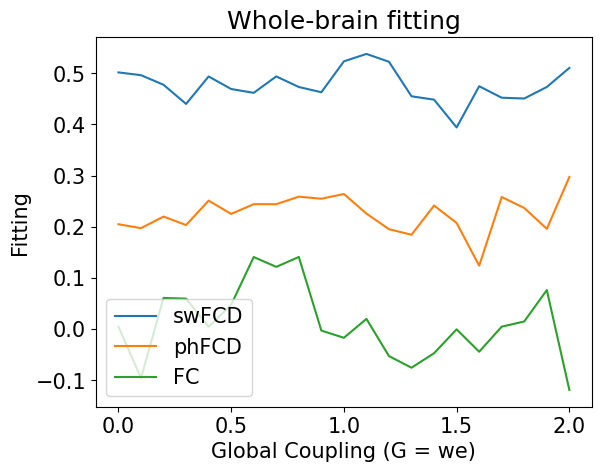

In [4]:
fig_goptim.plot_goptim('Datos/Results/Results_test/DecoEtAl2018_fneuro.mat')